# Add On: Making publication ready figures

In this short text I will try to put some guidelines of how to generate plots with an appropriate size, such that you can use the examples right away in your Jupyter notebook.

You would like to assemble your Figures in a manuscript from plots that you generate as PDF files, i.e.they contain vector graphics. This has the advantage that you can scale them to the appropriate size afterwards such to squeeze them in on-column or two-column Figures. While this is tempting, it is carrying the danger that you scale each plot differently and then all plots have different axis label sizes and tick sizes, which finally creates a mess.

To prevent that, one could readily start creating the plots in the appropriate size of on-column or two column use with all the same axis and tick label sizes. Here are some hacks, that allow you to create and save production ready plots directly from your Jupyter notebooks.

## Creating a plot with a specific bounding box size


If you create a plot in matplotlib you can specify a size with the parameter *figsize*, e.g.

```
plt.figure(figsize=(3,2))
```

for a figure of a width of 3 *inches* or 7.62 *cm* and a height of 2 *inches* (5.08 *cm*). If you do not use this parameter or if you even do not use the ```plt.figure()``` command, matplotlib will use the default size, which is often 8 *inches* times 6 *inches*. The default size is way to big as the figure would be then just a whole A4 page wide. A proper size of a plot for a single column in a two column paper would be the above 3 *inches* times 2 *inches* as a the whole paper width is 21 *cm* minus a marging of about 3 *cm* on each side gives a column width of about (21-6)/2=7.5 *cm*.

The Plot shown in Figure @fig-1 is created with the following commands

```
plt.figure(figsize=(3,2), dpi=150)
x=np.linspace(0,np.pi*4,200)
plt.plot(x,np.sin(x),color='k')
plt.xlabel(r"angle $\theta$ in [rad]")
plt.ylabel(r"$\sin(\theta)$")
plt.savefig("figure_example.pdf",
    bbox_inches = 'tight')
plt.show()
```

The resulting PDF file contains a plot that has a bounding box, that is exactly 3 *inches* times 2 *inches*. So if you insert the plot in any drawing program like Adobe Illustrator, Affinity Designer or even into text processing software like Word or Pages, the bounding box of this plot, will exactly be of this size and you can arrange additional graphs to form a whole figure easily without rescaling thing. 
If you use the plot in \LaTeX manuscript, which is two-column it can be used without scaling, i.e. by ```\includegraphics{Figure 1.pdf}```to show up in the appropriate size over one column.

There are a few more things to realize. 

- While the bounding box of this figure is of this size, the axis box is smaller and often there is a certain empty space on the left/bottom side between the axis labels and the edge of the bounding box. That very much depends on you specific plot. We will address how to create a figure with a fixed axis frame size in the second section.

- The font size on the axis is now 10 or 11 *pts*, which matches the font size of most documents you creating using this figure.  I used the following plt.rcParams: 'axes.labelsize': 11, 'xtick.labelsize' : 10, 'ytick.labelsize' : 10 for the shown plot.

- You will also realize that working with this figure size is not good in a Jupyter notebook. This has to do with how the Jupyter translates the output into the PNG file that is displayed inline. A way to enlarge the plot in the Jupyter notebook but keep its PDF size is to increase the **dpi** parameter in the ```plt.figure(figsize=(3,2), dpi=150)``` command. It is typically set to dpi=75, which is now way to small. A setting dpi=150 seems a reasonable compromise between on-screen and print size. If you want to be completely independent 

- The ```plt.savefig```command uses and additional ```bbox_inches = 'tight'```parameter, which ensures that the bounding box is really enclosing all plot components accurately.

In [61]:
import matplotlib as mpl
import matplotlib.font_manager as font_manager
from IPython.core.display import HTML
import matplotlib.pyplot as plt
import numpy as np

In [63]:
plt.rcParams.update({'font.size': 12,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'axes.labelsize': 11,
                     'xtick.labelsize' : 10,
                     'ytick.labelsize' : 10,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 

%config InlineBackend.figure_format = 'retina'

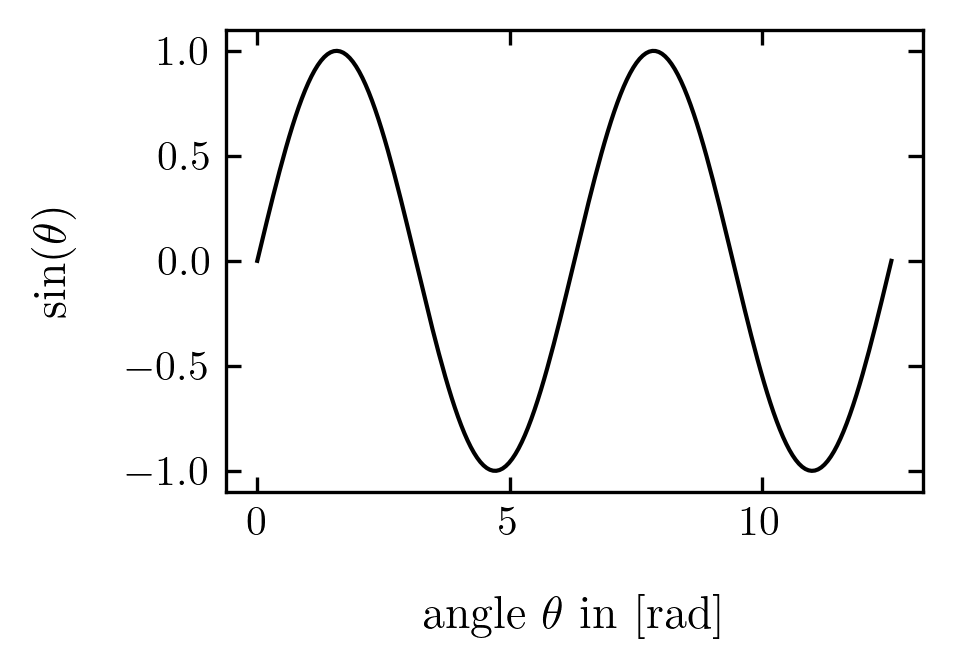

In [65]:
plt.figure(figsize=(3,2), dpi=150)
x=np.linspace(0,np.pi*4,200)
plt.plot(x,np.sin(x),color='k')
plt.xlabel(r"angle $\theta$ in [rad]")
plt.ylabel(r"$\sin(\theta)$")
plt.savefig("figure_example1.pdf",bbox_inches = 'tight')
plt.show()

Loading this figure into any software will result in a Figure with a size corresponding to the adjusted width.

![](img/bbox_size.png)

## Creating a plot with a specific axis frame size




The axis frame is the box of the frame providing the axes. When creating a figure with the ```plt.figure()``` command the axis frame is calculated by matplotlib to be inside the bounding box specified by the ```figsize```, such that all axis annotations fit inside as well. The axis frame is therefore smaller than the specified bounding box and often depends on the axis labels and additional things. If you want to create a plot with a fixed size of the axis frame, it is useful to add a function to your code that sets this size of the axis frame. 
This function could be

```
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)
```

where you have to specify the desired width and height (in inches) of the current axis *ax*. The function does not return anything but sets directly the size. 

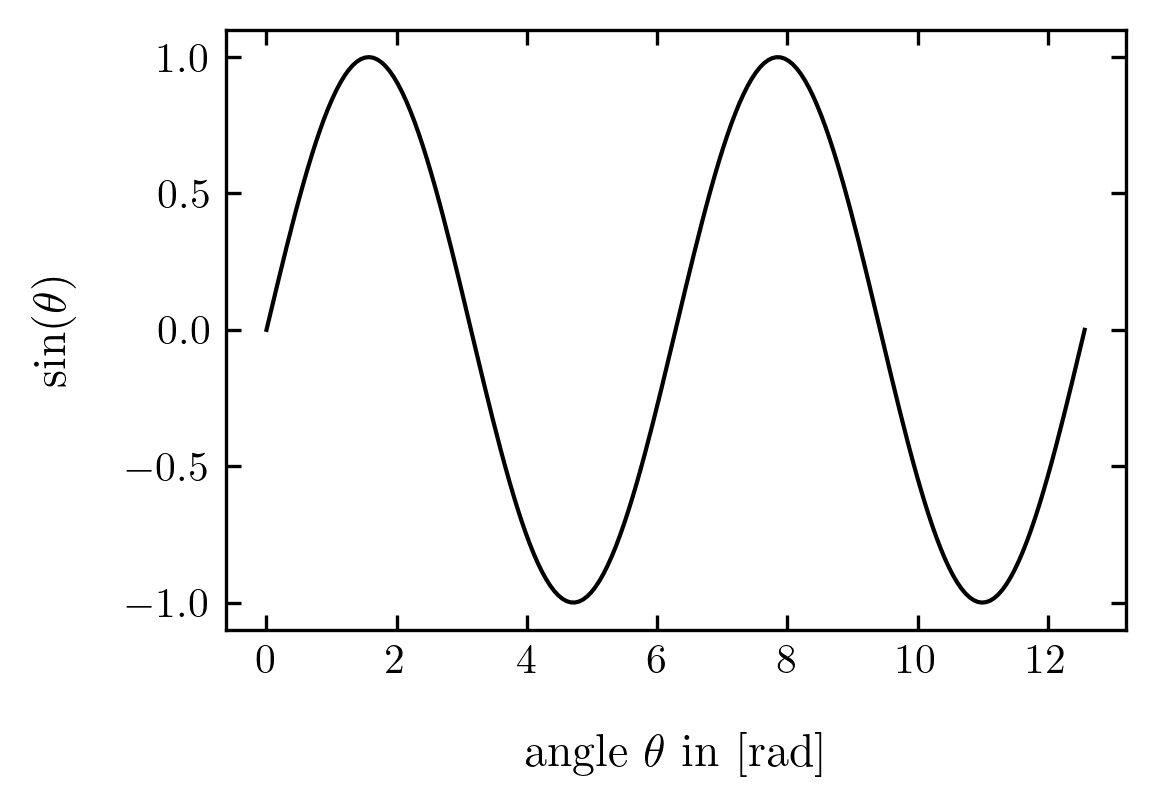

In [66]:
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

fig=plt.figure(dpi=150)
ax=plt.axes()
ax.plot(x,np.sin(x),color='k')
ax.set_xlabel(r"angle $\theta$ in [rad]")
ax.set_ylabel(r"$\sin(\theta)$")
set_size(3,2)
#plt.savefig("figure_example2.pdf",bbox_inches = 'tight')
plt.show()

If you load this Figure into a graphics software or text processing software, the Figure box, should have a dimension of 7.62 cm times 5.08 cm, without any rescaling:

![](img/box_size.png)

## Choosing fonts

Matplotlib can access a number of different fonts. Finding the appropriate one to match formula style of your document or publication can be difficult. A list of fonts available to matplotlib can be obtained with the following code snippet, which I found [here](https://jonathansoma.com/lede/data-studio/matplotlib/list-all-fonts-available-in-matplotlib-plus-samples/).

In [60]:


def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

In case you are writing your document in *LaTeX*, the **cmXXXX** fonts might be of interest to you as the match the font used in the *LaTeX* documents. Here is an example:

In [57]:
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 12,
                     'axes.labelsize': 12,
                     'axes.labelpad': 12,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 10,
                     'ytick.labelsize' : 10,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',
                     'font.family' : 'serif',
                     'font.serif' : cmfont.get_name(),
                     "axes.formatter.use_mathtext": True,
                     #'text.usetex': True,
                     'mathtext.fontset' : 'cm'
                    })

In [58]:
x=np.linspace(0,np.pi,100)

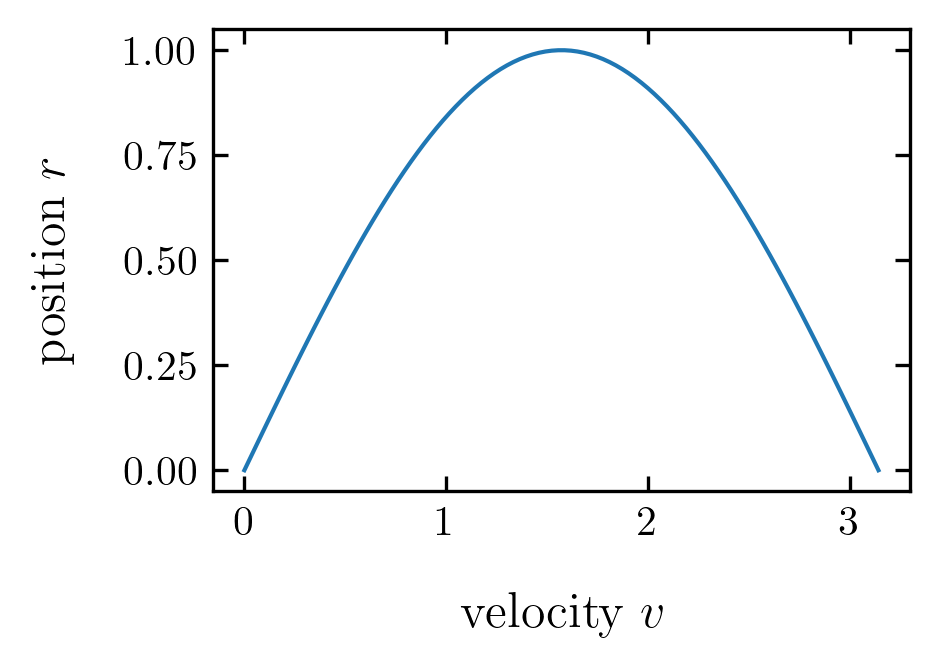

In [59]:
plt.figure(figsize=(3,2),dpi=150)
plt.plot(x,np.sin(x))
plt.xlabel(r"velocity $v$")
plt.ylabel(r"position $r$")
plt.show()